# Plots for SEA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.spatial import ConvexHull

making a plot for region for which earthquake data downloaded

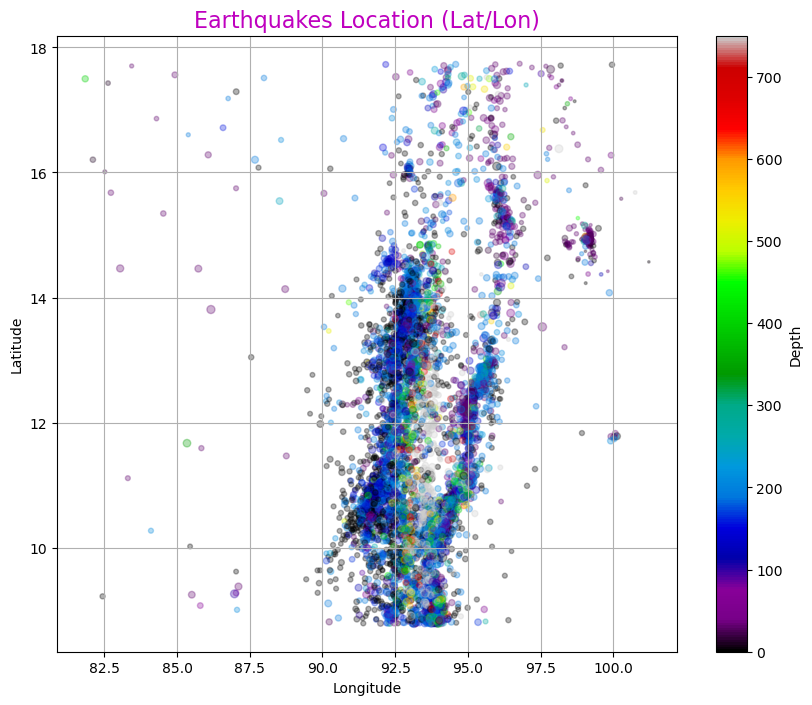

In [2]:
# specify the file name
filename=r"C:\Users\Dakshata\OneDrive - iitgn.ac.in\Thesis\Thesis\All_SEA\SEA1\Notebooks\Seismicdata_SEA1.csv"
Earthquake_data=pd.read_csv(filename)
colors=np.random.randint(4752,size=(4752))

depth_values = Earthquake_data["Depth (km)"]
norm = Normalize(vmin=min(depth_values), vmax=max(depth_values))
cmap = plt.get_cmap('nipy_spectral')

#plot the earthquake locations

plt.figure(figsize=(10,8))
plt.scatter(Earthquake_data['Longitude'],Earthquake_data['Latitude'],
           s=Earthquake_data['Magnitude']**2,c=depth_values**1.5, cmap=cmap, norm=norm, alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquakes Location (Lat/Lon)',fontsize=16,color='m')
plt.grid(True)
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca())
cbar.set_label('Depth')
plt.show()


Making polygoan around this region of earthquakes

Ploygon Coordinates
[[ 81.8441  17.4987]
 [ 82.4411   9.2196]
 [ 90.2306   8.811 ]
 [ 91.4032   8.7875]
 [ 93.194    8.7823]
 [ 93.9009   8.7814]
 [ 93.9902   8.7816]
 [ 95.348    8.8059]
 [ 96.392    8.8385]
 [100.1231  11.7811]
 [101.22    14.57  ]
 [ 99.9531  17.724 ]
 [ 96.78    17.74  ]
 [ 92.1736  17.7282]
 [ 83.441   17.704 ]]


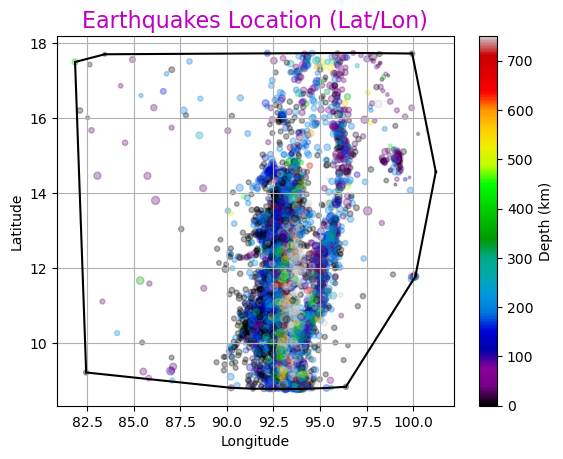

In [3]:
depth_values=Earthquake_data['Depth (km)']
norm=Normalize(vmin=min(depth_values),vmax=max(depth_values))
cmap=plt.get_cmap('nipy_spectral')



points=Earthquake_data[['Longitude','Latitude']].values
hull=ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex,0],points[simplex,1],'k-')
    
hull_vertices=points[hull.vertices]
print("Ploygon Coordinates")
print(hull_vertices)

coordinates=np.column_stack((hull_vertices[:,1],hull_vertices[:,0]))


output_filename=r"C:\Users\Dakshata\OneDrive - iitgn.ac.in\Thesis\Thesis\All_SEA\SEA1\InputData\SEA1shape.npy"
np.save(output_filename,coordinates)

sc=plt.scatter(Earthquake_data['Longitude'],Earthquake_data['Latitude'],
               Earthquake_data['Magnitude']**2,c=depth_values**1.5,cmap=cmap,norm=norm,alpha=0.3)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquakes Location (Lat/Lon)',fontsize=16,color='m')
plt.grid(True)


#adding colorbar
cbar=plt.colorbar(ScalarMappable(norm=norm,cmap=cmap),ax=plt.gca())
cbar.set_label('Depth (km)')
plt.show()

making rectangle around this region of earthquakes

Rectangle coordinates are: [[  8.7814  81.8441]
 [ 17.74    81.8441]
 [ 17.74   101.22  ]
 [  8.7814 101.22  ]
 [  8.7814  81.8441]]


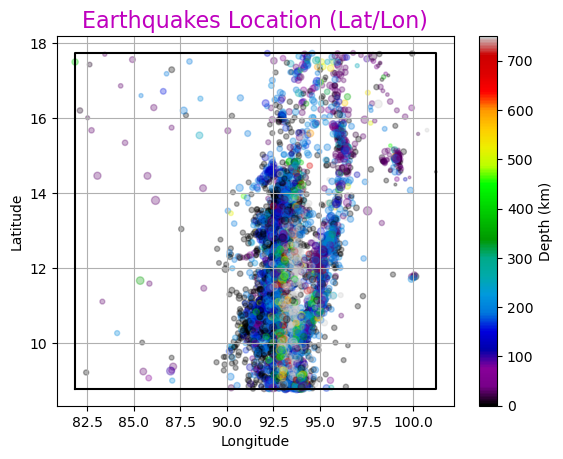

In [4]:
min_lon,max_lon=Earthquake_data['Longitude'].min(),Earthquake_data['Longitude'].max()
min_lat,max_lat=Earthquake_data['Latitude'].min(),Earthquake_data['Latitude'].max()


rectangle_coordinates=np.array([
    [min_lon,min_lat],
    [min_lon,max_lat],
    [max_lon,max_lat],
    [max_lon,min_lat],
    [min_lon,min_lat]
])

plt.plot(rectangle_coordinates[:,0],rectangle_coordinates[:,1],'k-')

coordinates=np.column_stack((rectangle_coordinates[:,1],rectangle_coordinates[:,0]))

output_file= r"C:\Users\Dakshata\OneDrive - iitgn.ac.in\Thesis\Thesis\All_SEA\SEA1\InputData\ch_rect.npy"
np.save(output_file,coordinates)

sc=plt.scatter(Earthquake_data['Longitude'],Earthquake_data['Latitude'],
               Earthquake_data['Magnitude']**2,c=depth_values**1.5,cmap=cmap,norm=norm,alpha=0.3)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquakes Location (Lat/Lon)',fontsize=16,color='m')
plt.grid(True)


#adding colorbar
cbar=plt.colorbar(ScalarMappable(norm=norm,cmap=cmap),ax=plt.gca())
cbar.set_label('Depth (km)')

print("Rectangle coordinates are:",coordinates)
plt.show()


Loading files

In [5]:
file_path= r"C:\Users\Dakshata\OneDrive - iitgn.ac.in\Thesis\Thesis\All_SEA\SEA1\InputData\SEA1shape.npy"


#provide the path where file is located

data=np.load(file_path)
print(data)

[[ 17.4987  81.8441]
 [  9.2196  82.4411]
 [  8.811   90.2306]
 [  8.7875  91.4032]
 [  8.7823  93.194 ]
 [  8.7814  93.9009]
 [  8.7816  93.9902]
 [  8.8059  95.348 ]
 [  8.8385  96.392 ]
 [ 11.7811 100.1231]
 [ 14.57   101.22  ]
 [ 17.724   99.9531]
 [ 17.74    96.78  ]
 [ 17.7282  92.1736]
 [ 17.704   83.441 ]]


In [6]:
file_path= r"C:\Users\Dakshata\OneDrive - iitgn.ac.in\Thesis\Thesis\All_SEA\SEA1\InputData\ch_rect.npy"



#provide the path where file is located

data=np.load(file_path)
print(data)

[[  8.7814  81.8441]
 [ 17.74    81.8441]
 [ 17.74   101.22  ]
 [  8.7814 101.22  ]
 [  8.7814  81.8441]]
